# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pirar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Créer une une liste de stopwords

In [3]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [4]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

## Tokeniser

In [5]:
# Récupération du contenu du fichier
path = "../data/all.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [6]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

563054 words found


In [7]:
words[:10]

['m', '■', 'Mi', '-.......', 'nèfoiifoTAMM', '.', '13', '.', '50', ';']

## Calculer la taille du vocabulaire

In [8]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

144539 words kept (51875 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [9]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('rue', 500),
 ('dem', 284),
 ('ans', 272),
 ('bruxelles', 254),
 ('heures', 248),
 ('prix', 243),
 ('très', 230),
 ('peu', 208),
 ('grand', 196),
 ('leurs', 194)]

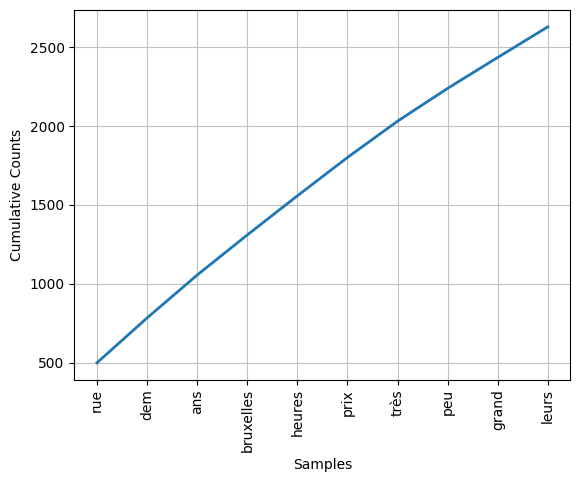

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [10]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [11]:
fdist.hapaxes()[:30]

['nèfoiifotamm',
 'relut',
 'aaptemfere',
 'sidt',
 'tsssix',
 'kneipp',
 'rhénane',
 'tallemagne',
 'ttè',
 'fctanm',
 'sacres',
 'téaoes',
 'plusieun',
 'lommiléa',
 'auemaades',
 'montagneuse',
 'bcrevlaaet',
 'hnltrm',
 'confert',
 'ïafflta',
 'priifiv',
 'homards',
 'ptoca',
 'prïn',
 'promenades',
 'couvertes',
 'aloat',
 'boumou',
 'ftssi',
 'moutnijo']

## Trouver les mots les plus longs du corpus

In [12]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['lllllllllllllllllllllllllllllllllllllillllllllllllllllllllllllllllllllllllllllh',
 'iiiiiiiiiiiiiiiiiiniiiiiiiiiiiiiiiiiiiiiii',
 'prendrectmminutratlspfequêtesur',
 'ulllllllllllllllllllllllllll',
 'elleavaitgracicusemenuccédé',
 'isonlattachésàdesarbresaux',
 'fonctionnairefitopposition',
 'incontestablecommissariat',
 'colorationlecharmantrôled',
 'domaineellesontrapidsment',
 'lesfiançaillesprétendues',
 'placômeqtabypouiéeaireâ',
 'raffinerietirlemontoise',
 'marcinelleetcouilletsoo',
 'damneraàrendreleurscomp',
 'briilammencontrepointée',
 'resullatollicielduvote',
 'llllllllllllllllllllll',
 'nrcineuietshiipleuienl',
 'iioiiielleaffirmaliijn',
 'candidatsconservateurs',
 'fraîcheurparunesavante',
 'trouvéexposésurlavoie',
 'etnombreusesadbésions',
 'développejournalistes',
 'enentendantretentirce',
 'tionnelleconcitoyens',
 'sicilienhèfjvpèndant',
 'éfofotahtatawtogmfen',
 'vousexclusivementàla']